# Projeto 2

## Precessão do periélio de Mercúrio

As leis de Kepler foram desenvolvidas com base em medidas (extremamente acuradas) realizadas a olho nú. Quando equipamentos mais precisos para medição de posição e tempo foram desenvolvidos, ficou claro que a trajetória de Mercúrio não era como esperado uma elipse, mas sim uma elipse com um deslocamento contínuo em seu periélio.

O deslocamento pode ser medido como de 566 arco-segundos por século. Posteriormente se descobriu que uma boa parte desse deslocamento é devida à influência dos outros planetas do sistema solar (além do Sol). Os cálculos prevêm o deslocamento de 523 arco-segundos por século. Resta então explicar aproximadamente 43 arco-segundos por século do deslocamento.

A explicação somente surgiu com o desenvolvimento da teoria da relatividade geral, que altera a lei da gravitação. Considerando o fator mais significativo, a força de gravitação fica adaptada para incluir fator relativístico da seguinte forma (escrita para a interação entre o Sol e Mercúrio):

$$ F_G = \frac{GM_SM_M}{r^2}\left(1 + \frac{\alpha}{r^2}\right),$$

onde $\alpha\approx1.1\cdot10^{-8}\,\mathrm{UA}^2$ (para Mercúrio), $GM_S=4\pi^2\,\mathrm{UA}^3/\mathrm{ano}^2$ e a força é na direção radial para dentro. Projetando a força nas direções $(x,y)$ e considerando o Sol na origem:

\begin{eqnarray}
\frac{d^2x}{dt^2} & = & -\frac{GM_S}{r^3}\left(1 + \frac{\alpha}{r^2}\right)x\\
\frac{d^2y}{dt^2} & = & -\frac{GM_S}{r^3}\left(1 + \frac{\alpha}{r^2}\right)y\\
\end{eqnarray}

onde $r = \sqrt{x^2+y^2}.$

Para completar, usamos as seguintes condições iniciais com Mercúrio inicialmente no seu ponto mais afastado do Sol (veja seção 4.3 do livro *Computational Physics* de Giordano e Nakanishi para explicação das expressões):

\begin{eqnarray}
x(0) & = & (1+e)a\\
y(0) & = & 0\\
v_x(0) & = & 0\\
v_y(0) & = & \sqrt{\frac{GM_S(1-e)}{a(1+e)}},
\end{eqnarray}

onde para Mercúrio $a \approx 0.39\,\mathrm{UA}$ (eixo maior da elipse) e $e\approx0.206$ (excentricidade).

O projeto consiste em avaliar a contribuição do fator relativístico para a precessão do periélio de Mercúrio.



In [164]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.integrate import odeint

gm = 4*np.pi**2
a = []

def func(ro, b,t):
    return ro * t
def r(x,y) : 
    return np.sqrt(x**2 + y**2)
def func_estado(xyuv, t, gm,alfa):
    x,y,u,v = xyuv
    return [u,v, - gm/(r(x,y)**3)*(1+alfa/r(x,y)**2) * x,- gm/(r(x,y)**3)*(1+alfa/r(x,y)**2)*y]
def calc_derivadas(derivadas):
    i=1
    while(derivadas[i]<0):
       i+=1 
    return i

In [233]:
def trajetoria(alfa):
    a = 0.39
    e = 0.206
    T = 0.241096
    condicoes_iniciais = [a*(1+e),0,0,np.sqrt(gm*(1-e)/(a*(1+e)))]
    first = False
    tempo = np.linspace(0,10*T,10000)
    xyuv_now = odeint(func_estado, condicoes_iniciais,tempo, args = (gm,alfa))   
    return xyuv_now,tempo
derivadas = []


alpha = 0.01 e alpha = 0


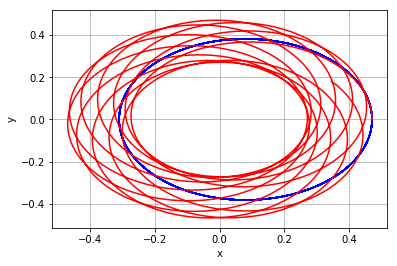

In [234]:
xyuv_now,t = trajetoria(0)

xs = xyuv_now[:,0]
ys = xyuv_now[:,1]
plt.plot(xs,ys,label = 'alfa = 0', color = 'blue')

xyuv_now,t = trajetoria(0.01)

xs = xyuv_now[:,0]
ys = xyuv_now[:,1]
plt.plot(xs,ys,label = 'alfa = 0.01',color = 'Red')

plt.xlabel('x')
plt.ylabel('y')

plt.grid(True)
print('alpha = 0.01 e alpha = 0')
plt.show()

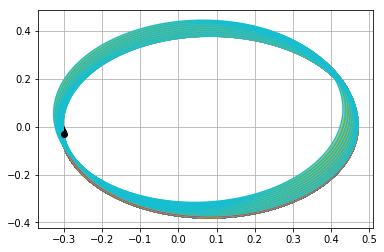

In [256]:
list_alfa =np.linspace(0,0.002,20)

derivadas = []
angles = []
t_angles = []
t = []
list_ro = []

for i in list_alfa:
    xyuv_now,t = trajetoria(i)
    i = 0
    for x,y,u,v in xyuv_now:
        derivadas.append(x*u+y*v)

    i = calc_derivadas(derivadas)
    
    px = xyuv_now[i][0]
    py = xyuv_now[i][1]
    
    theta = np.arctan2(px,py) + np.pi
    angles.append(theta)
    xs = xyuv_now[:,0]
    ys = xyuv_now[:,1]
    
    plt.plot(xs,ys)
    plt.plot(px,py,'ok')
    
    #calcula_ro(xyuv_now,t,i)
    

plt.grid(True)
plt.show()    


Text(0.5,0,' Alpha .$10^{-3}$')

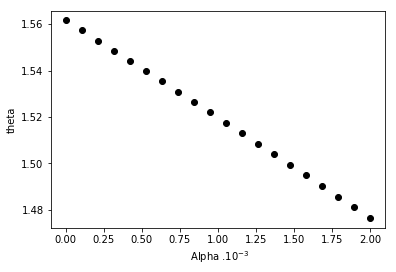

In [249]:
plt.plot(list_alfa*10**3,np.abs(angles),'ok')
plt.ylabel('theta')
plt.xlabel(' Alpha .$10^{-3}$')
plt.title("Tetha x Alpha")
